In [2]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

In [3]:
def filter1(img, filter, off):
    """
    Applies a filter to an image.
    :param img: The image to be filtered.
    :param filter: The filter to be applied.
    :param off: The offset to be added to the filtered image.
    :return: The filtered image.
    """
    # Get the dimensions of the image
    rows, cols = img.shape[:2]
    # Get the dimensions of the filter
    filter_rows, filter_cols = filter.shape
    # Calculate the padding size
    pad_rows = filter_rows // 2
    pad_cols = filter_cols // 2
    # Pad the image with zeros
    padded_img = np.pad(img, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='constant', constant_values=0)
    # Create an empty array to store the filtered image
    filtered_img = np.zeros((rows, cols))
    # Apply the filter to the image
    for i in range(rows):
        for j in range(cols):
            # Extract the region of interest
            region = padded_img[i:i + filter_rows, j:j + filter_cols]
            # Apply the filter
            filtered_img[i, j] = np.sum(region * filter) + off
    # Clip the values to be in the range [0, 255]
    filtered_img = np.clip(filtered_img, 0, 255)
    # Convert to uint8
    filtered_img = filtered_img.astype(np.uint8)
    return filtered_img

In [4]:
def filter2(img, filter, off, edge):
    """
    Applies a filter to an image with edge handling.
    :param img: The image to be filtered.
    :param filter: The filter to be applied.
    :param off: The offset to be added to the filtered image.
    :param edge: The edge handling method ('zero', 'mirror', 'wrap').
    :return: The filtered image.
    """
    # Get the dimensions of the image
    rows, cols = img.shape[:2]
    # Get the dimensions of the filter
    filter_rows, filter_cols = filter.shape
    # Calculate the padding size
    pad_rows = filter_rows // 2
    pad_cols = filter_cols // 2
    # Pad the image with zeros
    if edge == 'min':
        padded_img = np.pad(img, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='minimum')
    elif edge == 'max':
        padded_img = np.pad(img, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='maximum')
    elif edge == 'continue':
        padded_img = np.pad(img, ((pad_rows, pad_rows), (pad_cols, pad_cols)), mode='edge')
    else:
        raise ValueError("Invalid edge handling method. Use 'zero', 'mirror', or 'wrap'.")
    # Create an empty array to store the filtered image
    filtered_img = np.zeros((rows, cols))
    # Apply the filter to the image
    for i in range(rows):
        for j in range(cols):
            # Extract the region of interest
            region = padded_img[i:i + filter_rows, j:j + filter_cols]
            # Apply the filter
            filtered_img[i, j] = np.sum(region * filter) + off
    # Clip the values to be in the range [0, 255]
    filtered_img = np.clip(filtered_img, 0, 255)
    # Convert to uint8
    filtered_img = filtered_img.astype(np.uint8)
    return filtered_img


In [5]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

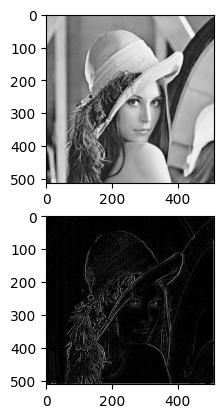

In [6]:
# read img
img = io.imread("lena.jpg")

# convert to numpy array
img = np.array(img)

# convert to grayscale
img = rgb2gray(img)

fm = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

imgOut = filter2(img, fm , 0, 'min')

# plot img
plt.figure(1)
plt.subplot(211)
plt.imshow(img, cmap = cm.Greys_r)
# plot imgOut
plt.figure(1)
plt.subplot(212)
plt.imshow(imgOut, cmap = cm.Greys_r)

plt.show()
